In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
#Download necessary NLTK resources
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df=pd.read_csv("spam.csv", encoding="latin-1")
df=df[["Category", "Message"]]
df.columns=["label", "message"]

In [6]:
df["label"]=df["label"].map({"ham":0, "spam":1})

In [13]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r"\d+", "", text)
    text=text.translate(str.maketrans("", "", string.punctuation))
    words=text.split()
    words=[word for word in words if word not in stopwords.words("english")]
    stemmer=PorterStemmer()
    words=[stemmer.stem(word) for word in words]
    return "".join(words)

In [14]:
df["clean_message"]=df["message"].apply(preprocess_text)

In [15]:
x_train, x_test, y_train, y_test=train_test_split(df["clean_message"], df["label"], test_size=0.2, random_state=42)

In [17]:
#Build Pipeline(TF-IDF + Navie Bayes)
pipeline=Pipeline([("tfidf", TfidfVectorizer(max_features=5000)),
("classifier", MultinomialNB(alpha=0.1))])

In [18]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=0.1))])

In [19]:
joblib.dump(pipeline, "spam_classifier.pkl")

['spam_classifier.pkl']

In [20]:
y_pred=pipeline.predict(x_test)

In [21]:
accuracy=accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


In [22]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.45      0.62       149

    accuracy                           0.93      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.93      0.93      0.91      1115



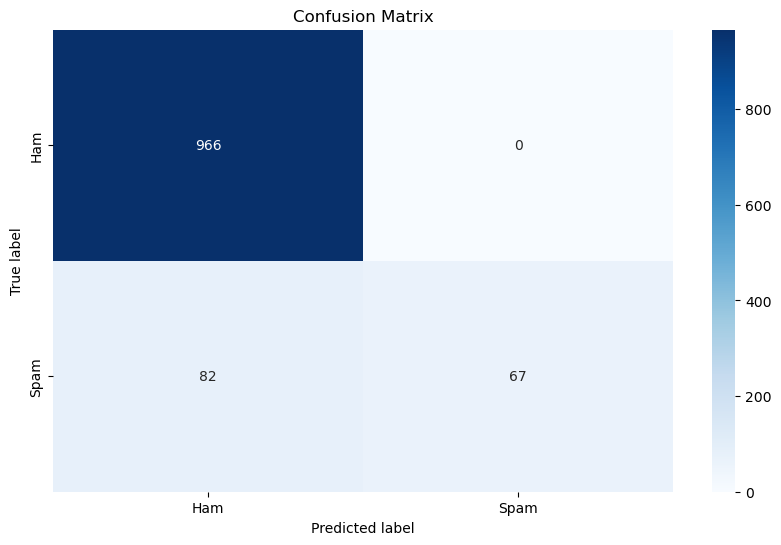

In [24]:
#Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
loaded_model=joblib.load("spam_classifier.pkl")
sample_text=["Congratulations! You've won a free Motorcycle worth 500000. Click here to claim."]
prediction=loaded_model.predict(sample_text)[0]
print(f"Sample Prediction: {